## How Solutions are Represented
A solution to the JSSP can be defined as a sequence of operations for each machine. The `Schedule` class maintains a list of `ScheduledOperations` for each machine, which stores the operation, the time it starts to be processed and the machine in which it is going to be processed.

The `Schedule` class is initialized with a `JobShopInstance`, which describes the JSSP you're working with. You can optionally pass a predefined schedule, a list of lists where each sublist represents the operations scheduled on a particular machine. In order to create a posible solution for this instance we can do it manually as follows:

First, the operations from the previous example are organized by their respective machines.

In [1]:
from job_shop_lib import JobShopInstance, Operation

CPU = 0
GPU = 1
DATA_CENTER = 2

job_1 = [Operation(CPU, 1), Operation(GPU, 1), Operation(DATA_CENTER, 7)]
job_2 = [Operation(GPU, 5), Operation(DATA_CENTER, 1), Operation(CPU, 1)]
job_3 = [Operation(DATA_CENTER, 1), Operation(CPU, 3), Operation(GPU, 2)]

jobs = [job_1, job_2, job_3]

instance = JobShopInstance(
    jobs,
    name="Example",
    # Any extra parameters are stored inside the
    # metadata attribute as a dictionary:
    lower_bound=7,
)

In [2]:
from job_shop_lib import ScheduledOperation, Schedule

cpu_operations = []
gpu_operations = []
data_center_operations = []

# Split the operations into three lists, one for each machine
for job in instance.jobs:
    for operation in job:
        if operation.machine_id == CPU:
            cpu_operations.append(operation)
        elif operation.machine_id == GPU:
            gpu_operations.append(operation)
        elif operation.machine_id == DATA_CENTER:
            data_center_operations.append(operation)

Note, that since each job does not have more than one operation for the same machine, we don't have to worry about the order of the operations in the list. However, we have to take into account the start time of each operation. In this case, we add to the last start time of the previous machine the maximum job duration of the instance. Of course, the solution will not be optimal, but it is a valid solution for the instance.

In [3]:
# Schedule the operations as they are ordered in the instance
def schedule_operations(operations, machine_id, start_time=0):
    machine_schedule = []
    for operation in operations:
        machine_schedule.append(
            ScheduledOperation(operation, start_time, machine_id)
        )
        start_time += 7

    return machine_schedule


cpu_schedule = schedule_operations(cpu_operations, CPU)
gpu_schedule = schedule_operations(gpu_operations, GPU, start_time=5)
data_center_schedule = schedule_operations(
    data_center_operations, DATA_CENTER, start_time=10
)

Now, we can create a `Schedule` object with the instance and the solution.

In [4]:
instance_schedule = [cpu_schedule, gpu_schedule, data_center_schedule]
schedule = Schedule(instance, instance_schedule)

In [6]:
print(f"Is the schedule complete? {schedule.is_complete()}")
print("Makespan:", schedule.makespan())

Is the schedule complete? True
Makespan: 25


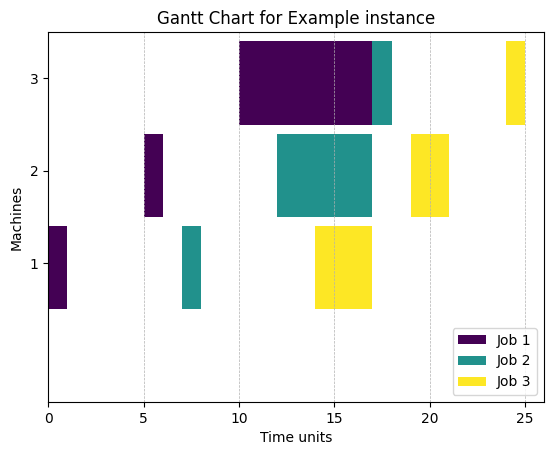

In [8]:
from job_shop_lib.visualization import plot_gantt_chart

_ = plot_gantt_chart(schedule)